In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import sys

sys.path.append('../../../Enhancer')  
from train.utils import EnhancerDataset, split_dataset, train_model, regression_model_plot, plot_filter_weight
from model.model import DanQ, ConvNetDeep

# Train with DanQ

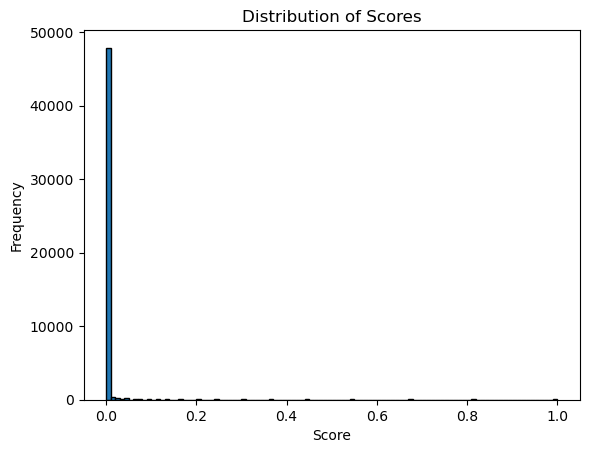

Using device: cuda
Model is on device: cuda:0
Epoch 1/200, Step 1/100, Loss: 0.0079
Epoch 1/200: Train Loss: 0.0066 , Test Loss: 0.0059
------------------------Evaluation------------------------
Label 1: MSE=0.0059, RMSE=0.0766, MAE=0.0250, R^2=-0.0516, Pearson=0.0044, Spearman=0.0109
Overall (Flattened): MSE=0.0059, RMSE=0.0766, MAE=0.0250, R^2=-0.0516, Pearson=0.0044, Spearman=0.0109
----------------------------------------------------------
Epoch 2/200, Step 1/100, Loss: 0.0039
Epoch 2/200: Train Loss: 0.0052 , Test Loss: 0.0058
------------------------Evaluation------------------------
Label 1: MSE=0.0058, RMSE=0.0763, MAE=0.0251, R^2=-0.0434, Pearson=-0.0148, Spearman=0.0008
Overall (Flattened): MSE=0.0058, RMSE=0.0763, MAE=0.0251, R^2=-0.0434, Pearson=-0.0148, Spearman=0.0008
----------------------------------------------------------
Epoch 3/200, Step 1/100, Loss: 0.0106
Epoch 3/200: Train Loss: 0.0051 , Test Loss: 0.0057
------------------------Evaluation------------------------

In [8]:
# Define some hyperparameters
seed = 42
batch = 400
learning_rate = 1e-5
target_labels = ['Motif Distance Score']
output_dir = '/pmglocal/ty2514/Enhancer/Enhancer/data/Synthetic_Distance_Results/DanQ_synthetic_motif_results'


#df = pd.DataFrame({'sequence':dna_sequences, 'score': scores})
#df = pd.read_csv("/pmglocal/ty2514/Enhancer/Enhancer/data/Synthetic_Distance_Results/synthetic_sequence.csv")
df = pd.read_pickle('/pmglocal/ty2514/Enhancer/Enhancer/data/Synthetic_Distance_Results/synthetic_sequence_sampled.pl')
# Plot histogram of scores
plt.hist(df['score'], bins=100, edgecolor='black')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
#plt.ylim(0,300)
plt.show()

train, test = split_dataset(df, split_type='random', cutoff = 0.8, seed = seed)

train = EnhancerDataset(train, feature_list=['score'], scale_mode = 'none')
test = EnhancerDataset(test, feature_list=['score'], scale_mode = 'none')

# DataLoader setup
train_loader = DataLoader(dataset=train, batch_size=batch, shuffle=True)
test_loader = DataLoader(dataset=test, batch_size=batch, shuffle=True)

input_model = DanQ(input_length = 608, num_classes = 1)

_, _, model, train_losses_by_batch, test_losses_by_batch, results, best_pearson_epoch, best_r2_epoch, device  = train_model(input_model, train_loader, test_loader, 
                                                                                                                            target_labels=target_labels,num_epochs=200, 
                                                                                                                        batch_size=batch, learning_rate=learning_rate, 
                                                                                                                        criteria='mse',optimizer_type = "adam", patience=10, 
                                                                                                                        seed = seed, save_model= True, dir_path=output_dir)

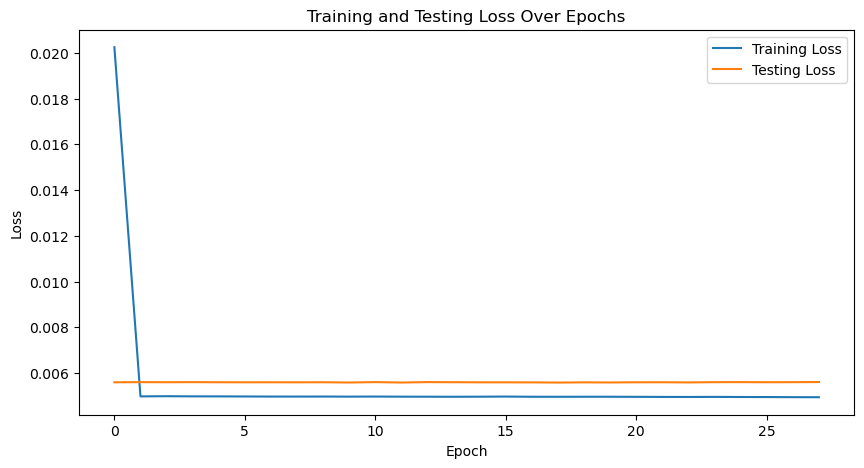

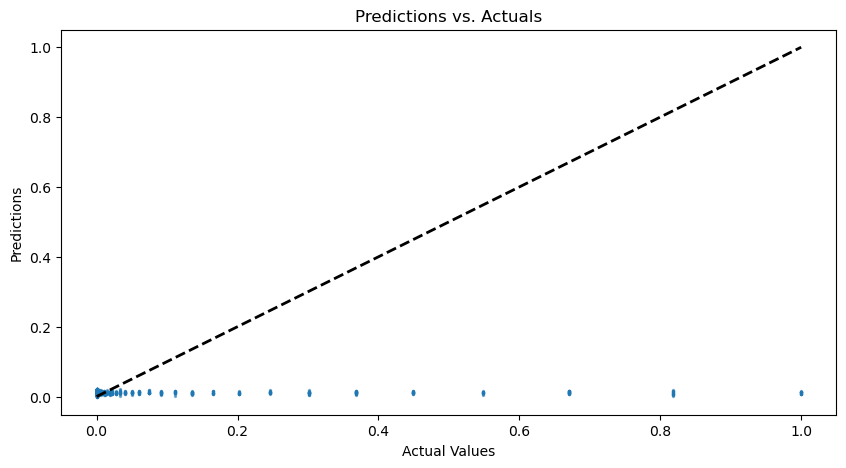

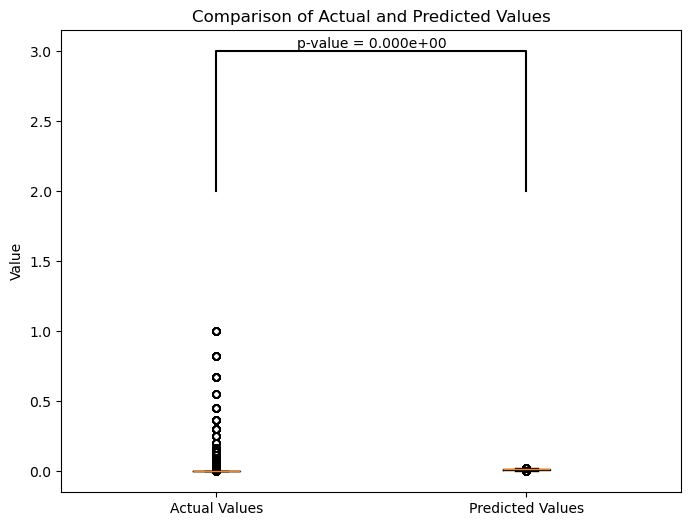

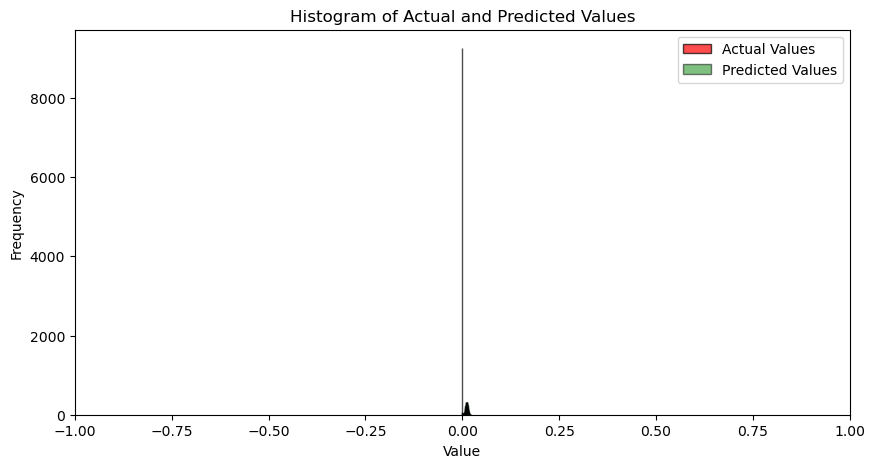

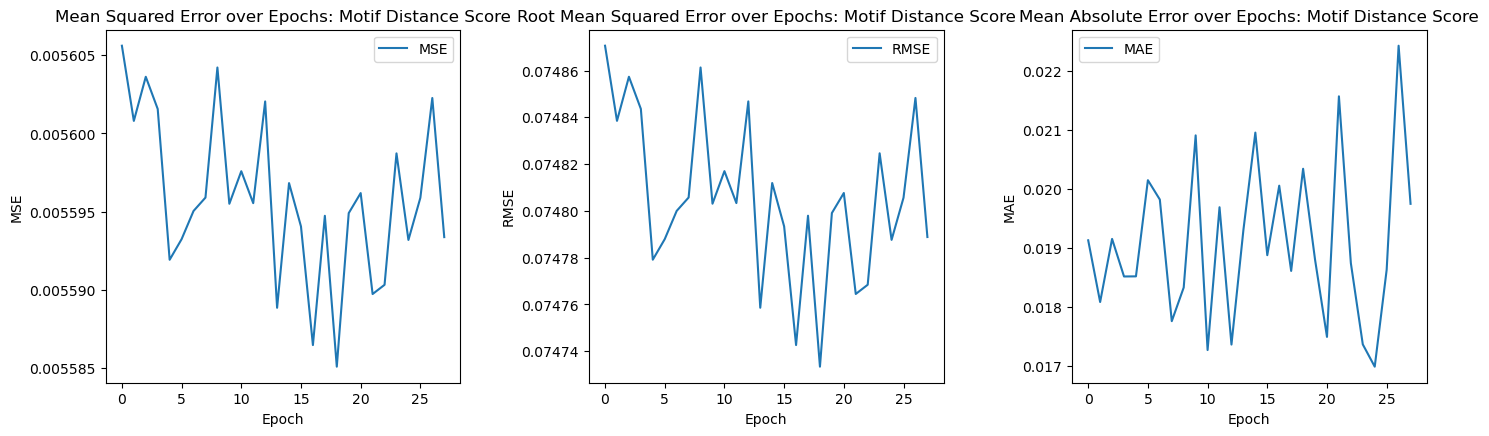

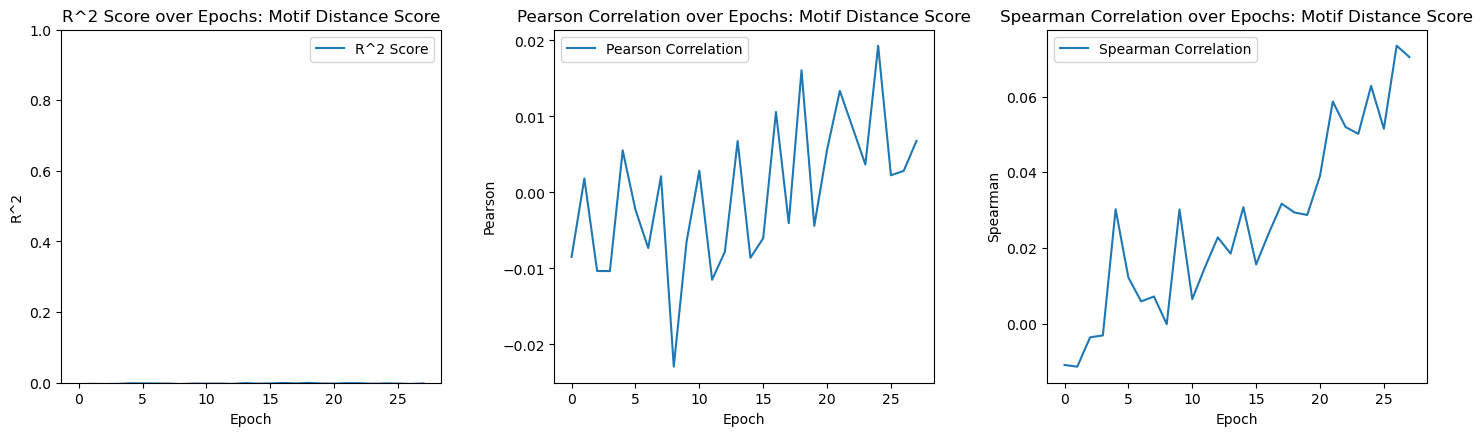

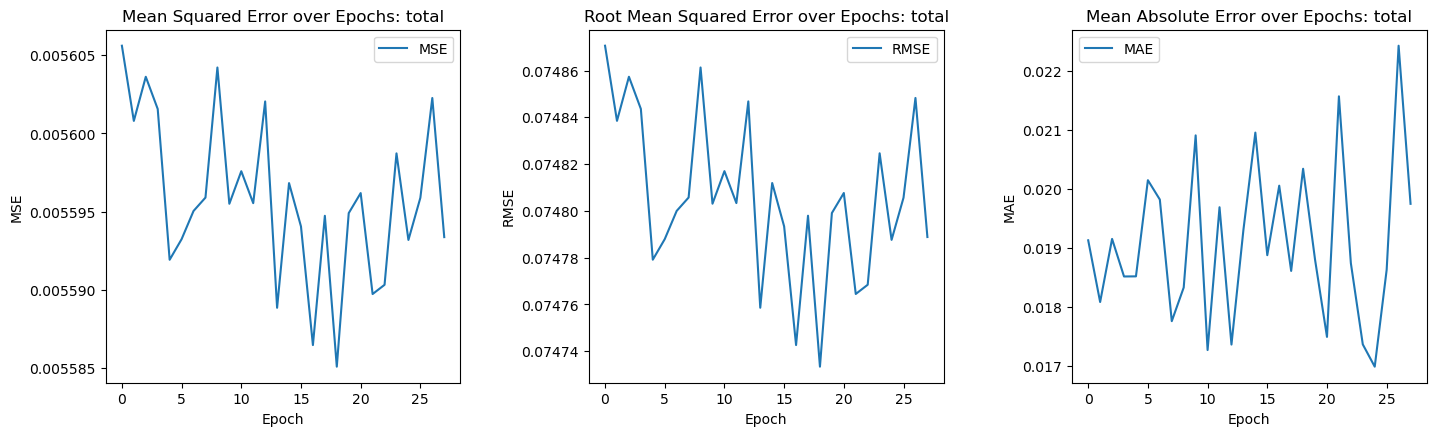

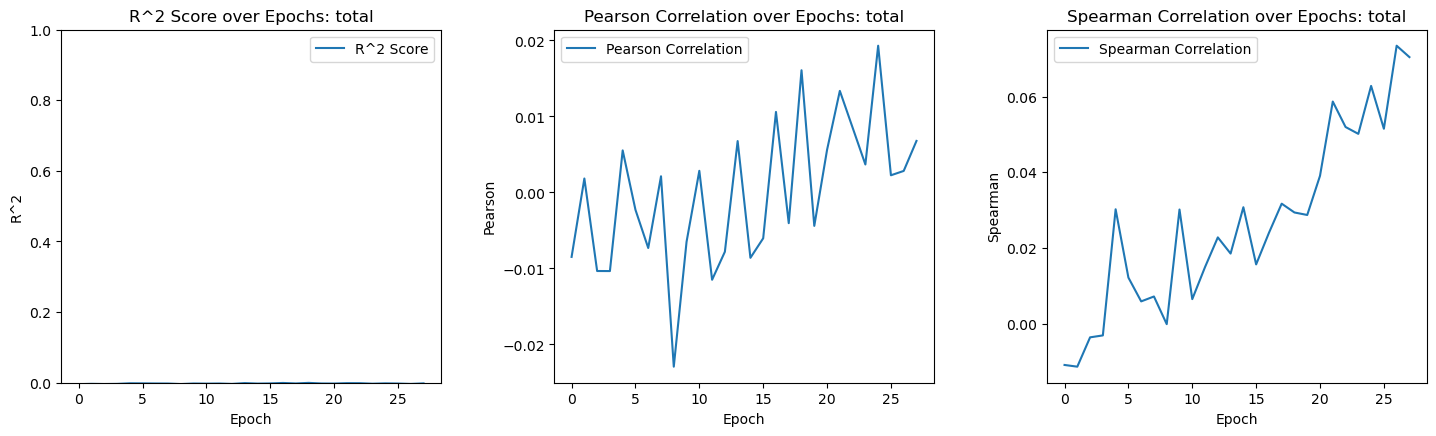

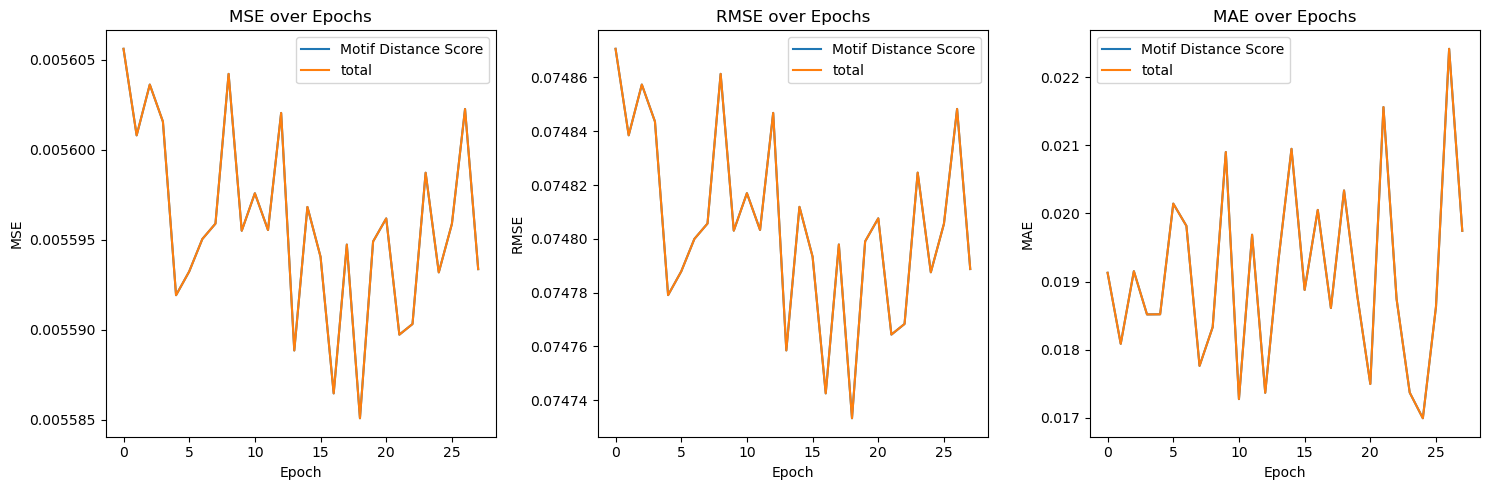

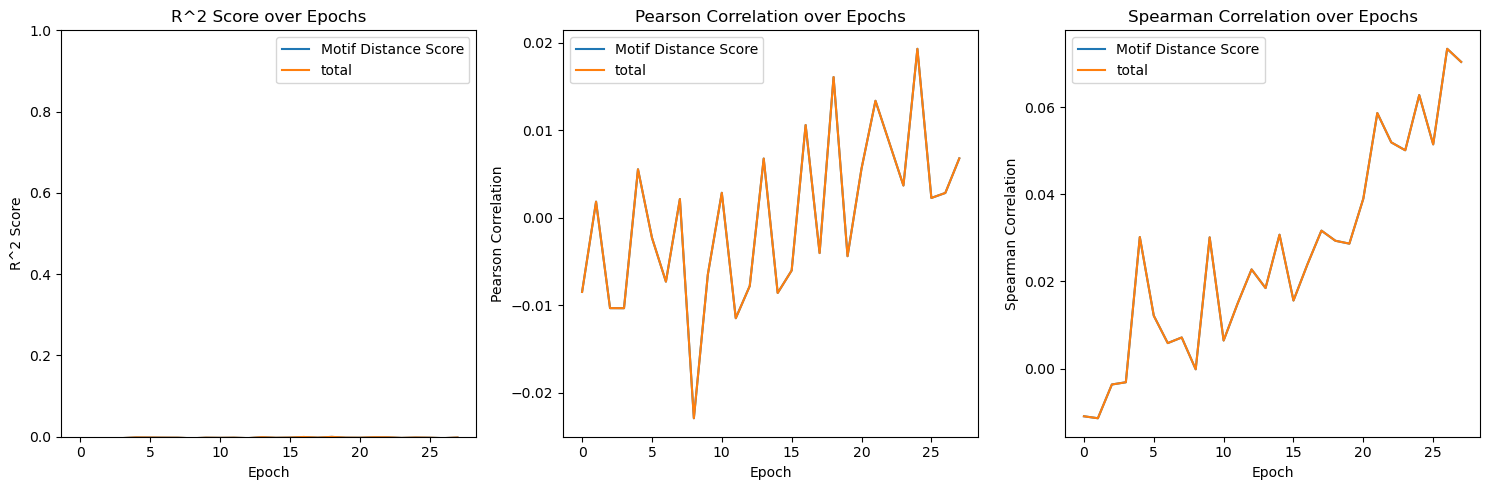

MSE: 0.0056, RMSE: 0.0748, MAE: 0.0197
R^2: -0.0019, Pearson Correlation: 0.0068, Spearman Correlation: 0.0704


In [6]:
#best_r2_epoch = 18

model_path = f'/pmglocal/ty2514/Enhancer/Enhancer/data/Synthetic_Distance_Results/DanQ_synthetic_motif_results/model_epoch_{best_r2_epoch}.pth'

mse, rmse, mae, r2, pearson_corr, spearman_corr = regression_model_plot(
    model, test_loader, train_losses_by_batch, test_losses_by_batch, 
    device, results, label_mode = "score", save_plot = False, dir_path = None, model_path = model_path, best_model=best_r2_epoch)

print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}, Pearson Correlation: {pearson_corr:.4f}, Spearman Correlation: {spearman_corr:.4f}")

# Train with ConvNetDeep

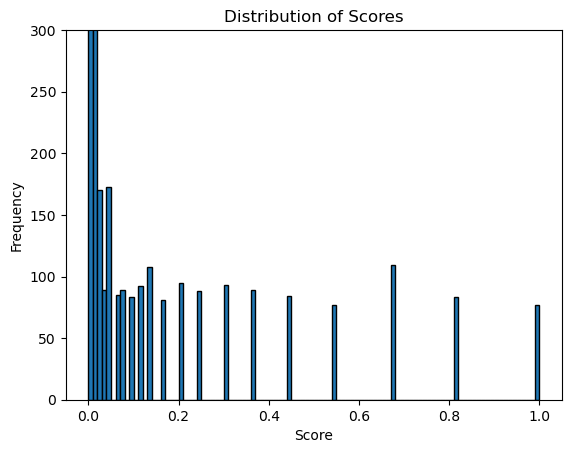

Using device: cuda
Model is on device: cuda:0
Epoch 1/200, Step 1/100, Loss: 0.1918
Epoch 1/200: Train Loss: 0.1637 , Test Loss: 0.0438
------------------------Evaluation------------------------
Label 1: MSE=0.0438, RMSE=0.2094, MAE=0.1615, R^2=-6.8517, Pearson=-0.0158, Spearman=-0.0192
Overall (Flattened): MSE=0.0438, RMSE=0.2094, MAE=0.1615, R^2=-6.8517, Pearson=-0.0158, Spearman=-0.0192
----------------------------------------------------------
Epoch 2/200, Step 1/100, Loss: 0.1445
Epoch 2/200: Train Loss: 0.1249 , Test Loss: 0.0325
------------------------Evaluation------------------------
Label 1: MSE=0.0325, RMSE=0.1803, MAE=0.1371, R^2=-4.8249, Pearson=-0.0143, Spearman=-0.0201
Overall (Flattened): MSE=0.0325, RMSE=0.1803, MAE=0.1371, R^2=-4.8249, Pearson=-0.0143, Spearman=-0.0201
----------------------------------------------------------
Epoch 3/200, Step 1/100, Loss: 0.1319
Epoch 3/200: Train Loss: 0.1100 , Test Loss: 0.0274
------------------------Evaluation------------------

In [9]:
# Define some hyperparameters
seed = 42
batch = 400
learning_rate = 1e-5
target_labels = ['Motif Distance Score']
output_dir = '/pmglocal/ty2514/Enhancer/Enhancer/data/Synthetic_Distance_Results/ConvNetDeep_synthetic_motif_results'


#df = pd.DataFrame({'sequence':dna_sequences, 'score': scores})
#df = pd.read_csv("/pmglocal/ty2514/Enhancer/Enhancer/data/Synthetic_Distance_Results/synthetic_sequence.csv")
df = pd.read_pickle('/pmglocal/ty2514/Enhancer/Enhancer/data/Synthetic_Distance_Results/synthetic_sequence_sampled.pl')
# Plot histogram of scores
plt.hist(df['score'], bins=100, edgecolor='black')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.ylim(0,300)
plt.show()

train, test = split_dataset(df, split_type='random', cutoff = 0.8, seed = seed)

train = EnhancerDataset(train, feature_list=['score'], scale_mode = 'none')
test = EnhancerDataset(test, feature_list=['score'], scale_mode = 'none')

# DataLoader setup
train_loader = DataLoader(dataset=train, batch_size=batch, shuffle=True)
test_loader = DataLoader(dataset=test, batch_size=batch, shuffle=True)

input_model = ConvNetDeep(num_classes=1, drop_out=0.3)

_, _, model, train_losses_by_batch, test_losses_by_batch, results, best_pearson_epoch, best_r2_epoch, device  = train_model(input_model, train_loader, test_loader, 
                                                                                                                            target_labels=target_labels,num_epochs=200, 
                                                                                                                        batch_size=batch, learning_rate=learning_rate, 
                                                                                                                        criteria='mse',optimizer_type = "adam", patience=10, 
                                                                                                                        seed = seed, save_model= True, dir_path=output_dir)

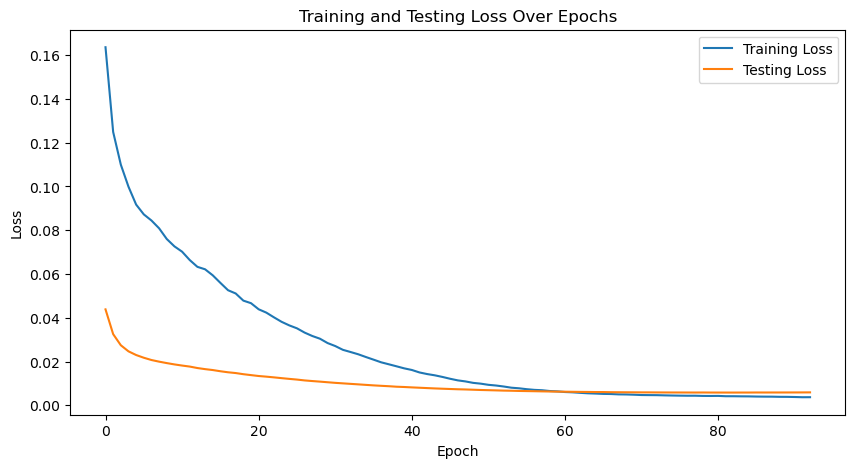

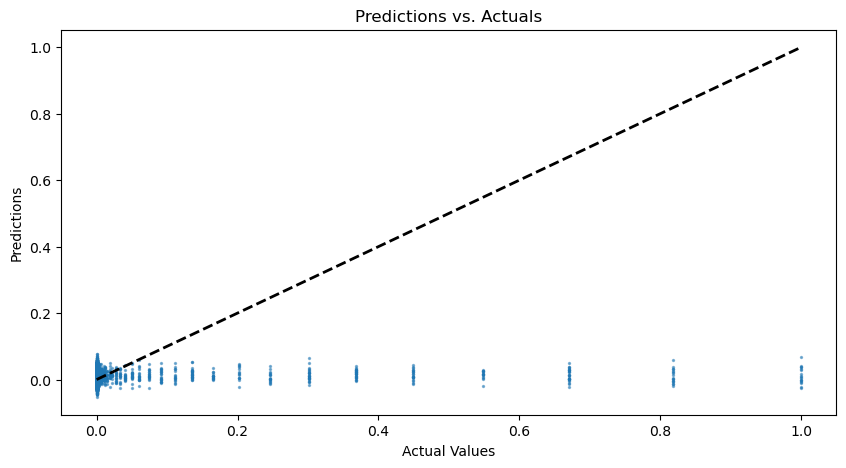

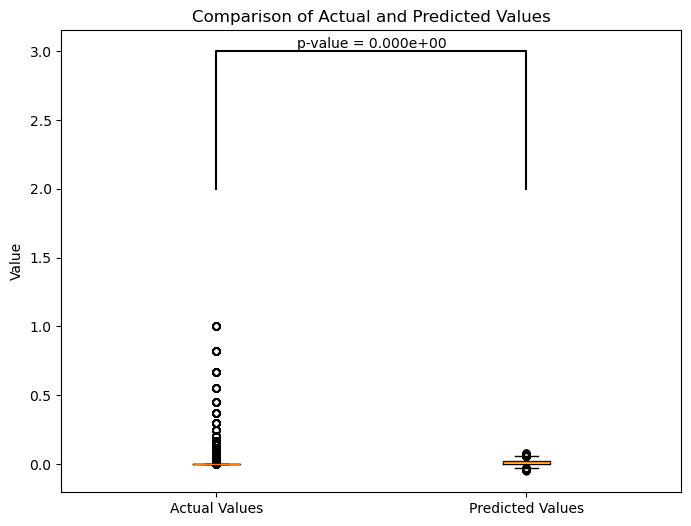

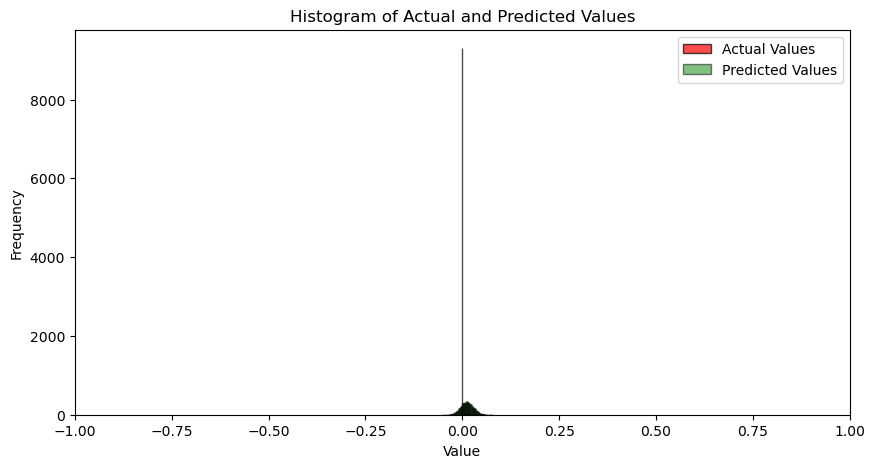

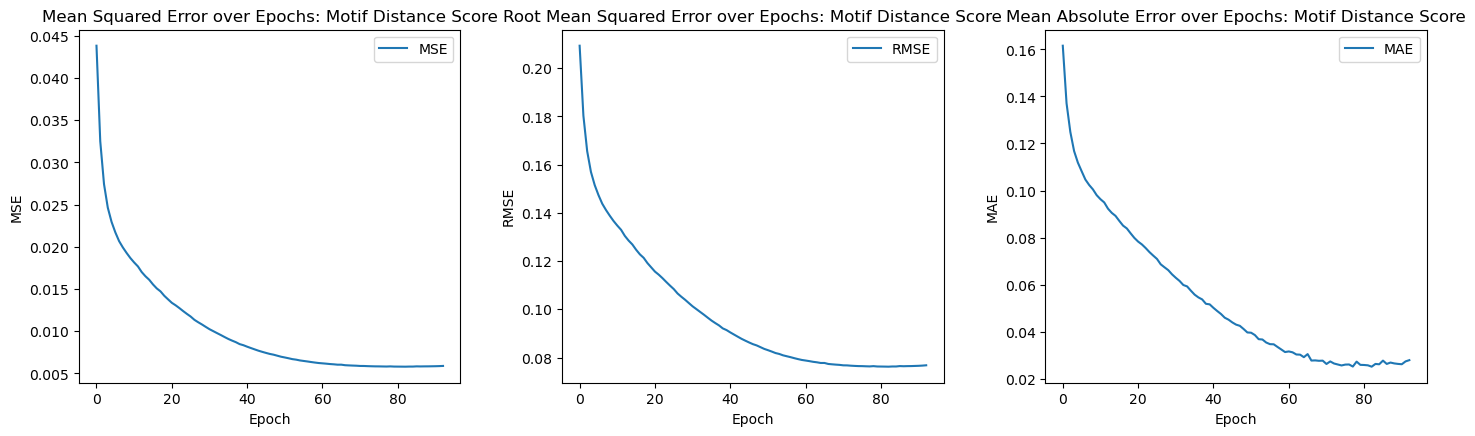

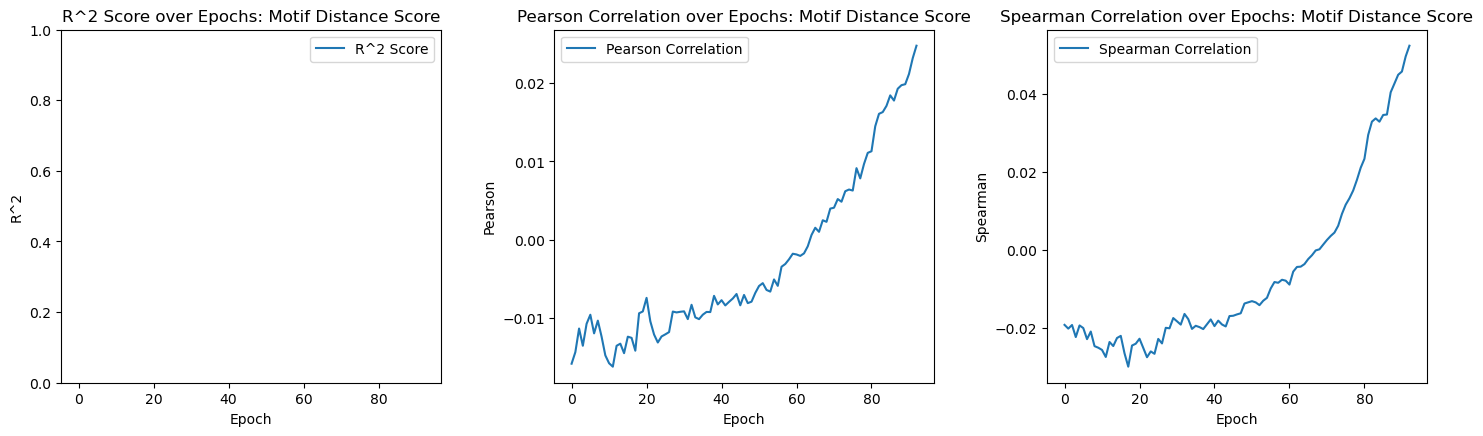

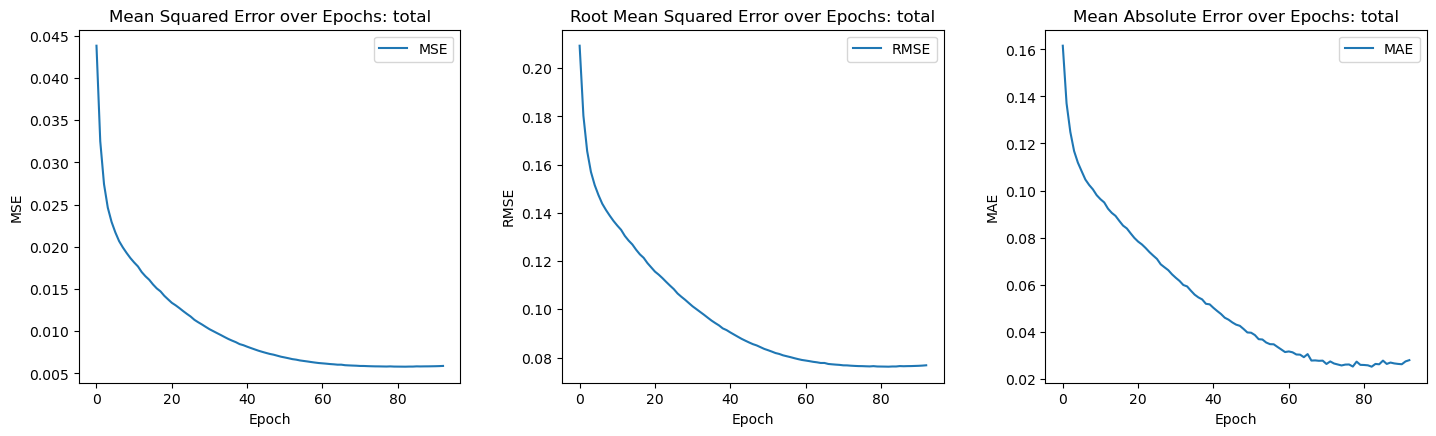

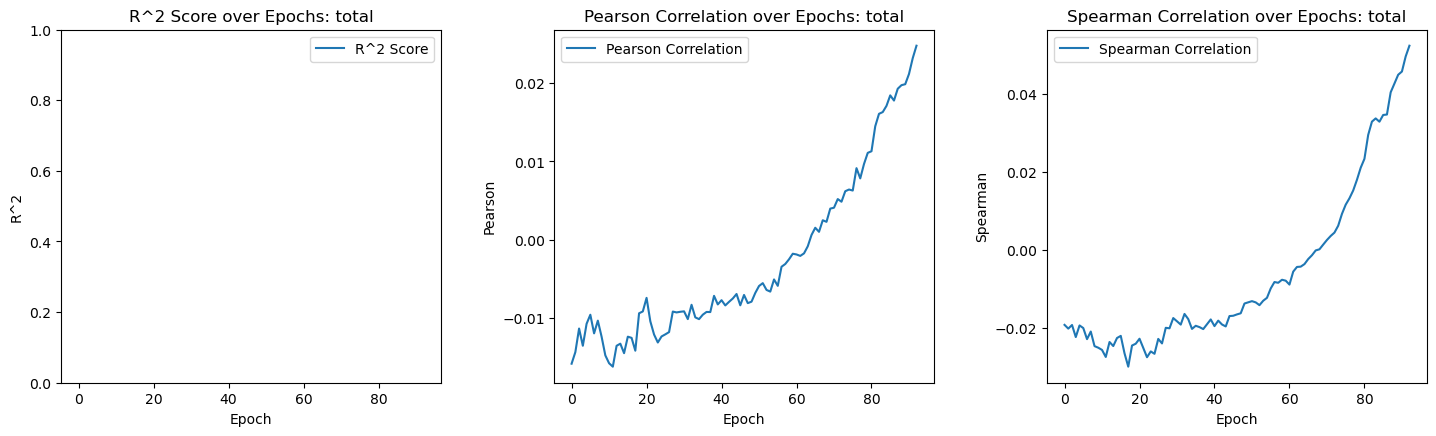

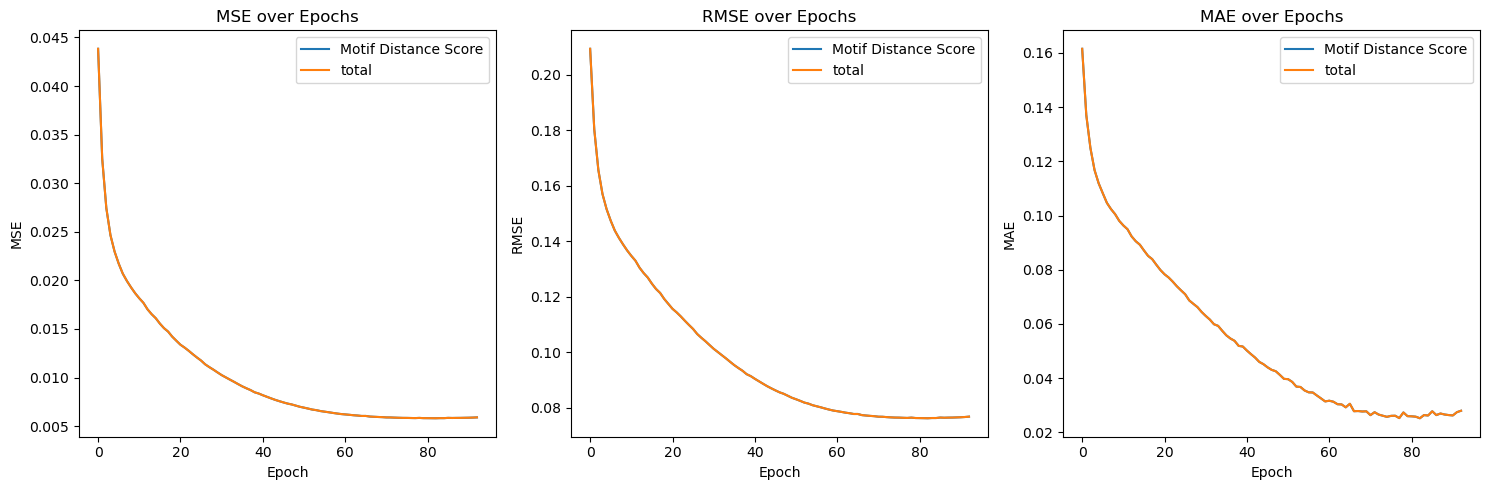

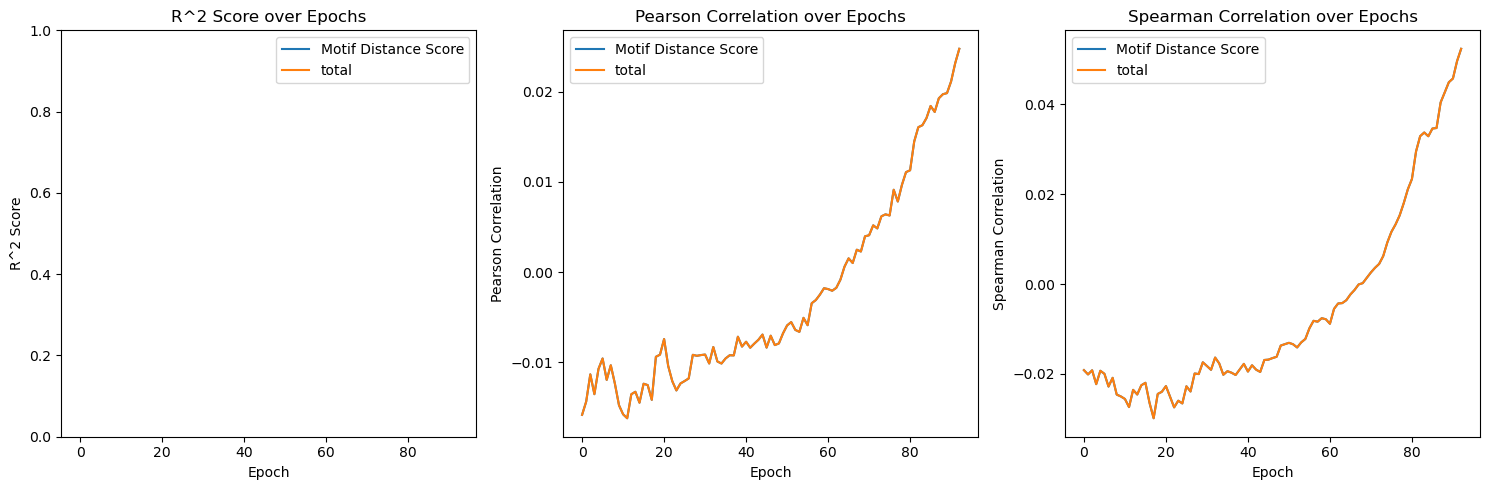

MSE: 0.0059, RMSE: 0.0768, MAE: 0.0279
R^2: -0.0561, Pearson Correlation: 0.0248, Spearman Correlation: 0.0524


In [10]:
#best_r2_epoch = 18

model_path = f'/pmglocal/ty2514/Enhancer/Enhancer/data/Synthetic_Distance_Results/ConvNetDeep_synthetic_motif_results/model_epoch_{best_r2_epoch}.pth'

mse, rmse, mae, r2, pearson_corr, spearman_corr = regression_model_plot(
    model, test_loader, train_losses_by_batch, test_losses_by_batch, 
    device, results, label_mode = "score", save_plot = False, dir_path = None, model_path = model_path, best_model=best_r2_epoch)

print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}, Pearson Correlation: {pearson_corr:.4f}, Spearman Correlation: {spearman_corr:.4f}")